In [37]:
from sklearn.datasets import make_classification
import numpy as np
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

<IPython.core.display.Javascript object>


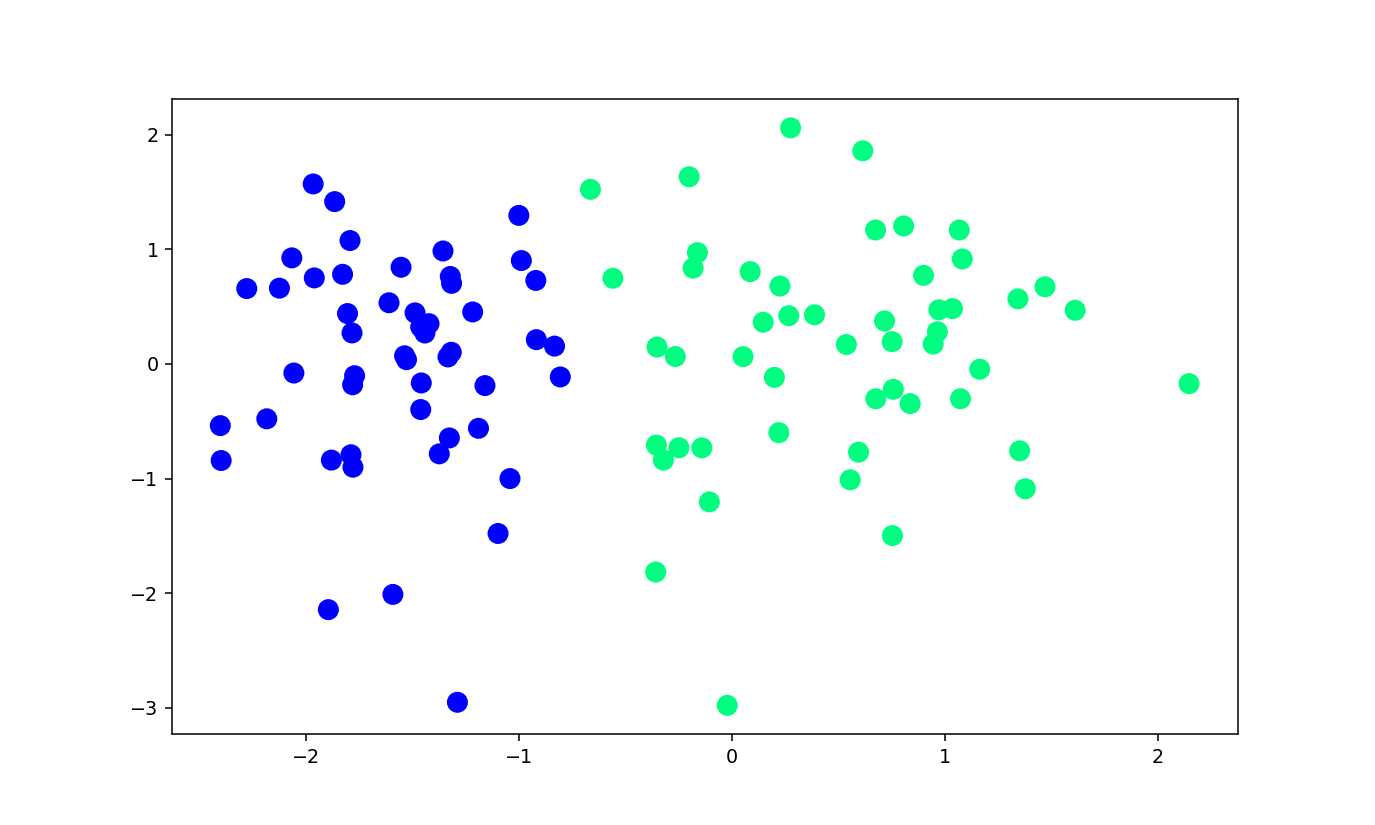

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)





In [39]:
def perceptron(X,y):
    X=np.insert(X,0,1,axis=1)#add 1 column at starting that contain value 1
    weights=np.ones(X.shape[1])
    lr=0.1
    for i in range(1000):
        j=np.random.randint(0,100)#total 100 rows
        y_hat=step(np.dot(X[j],weights)) #call step cunction to check value is positive or negative
        weights=weights+lr*(y[j]-y_hat)*X[j] #y[j]=0 means actual placement nahi hua
    return weights[0],weights[1:] #return firstintercept then coefficient

In [40]:
def step(z):
    return 1 if z>0 else 0

In [41]:
intercept_,coef_=perceptron(X,y)

In [42]:
print(intercept_)
print(coef_)

0.9
[1.41263487 0.18028205]


In [43]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [44]:
x_input=np.linspace(-3,3,100)
y_input=m*x_input+b

<IPython.core.display.Javascript object>


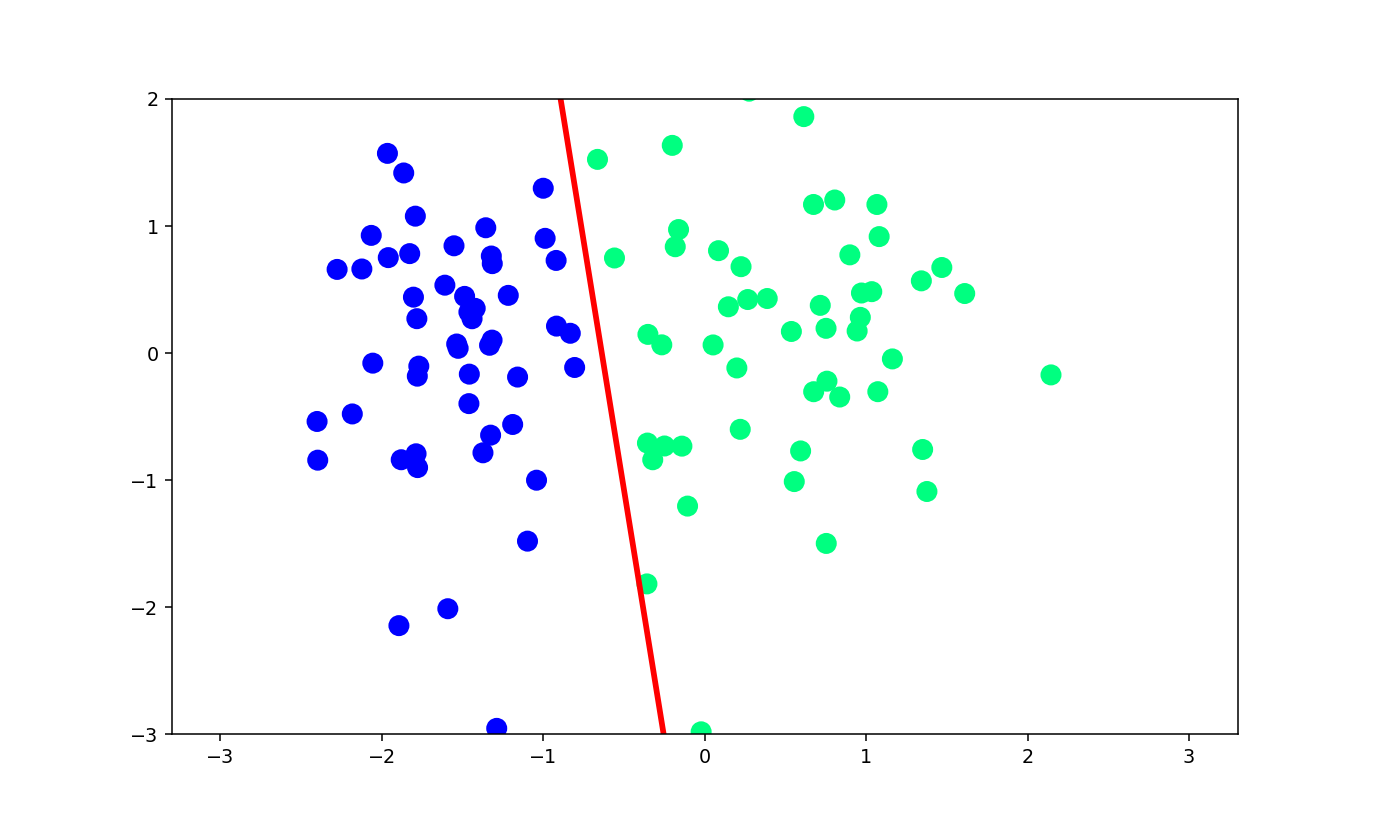

(-3.0, 2.0)

In [45]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [46]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b
m,b = perceptron(X,y)

In [47]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


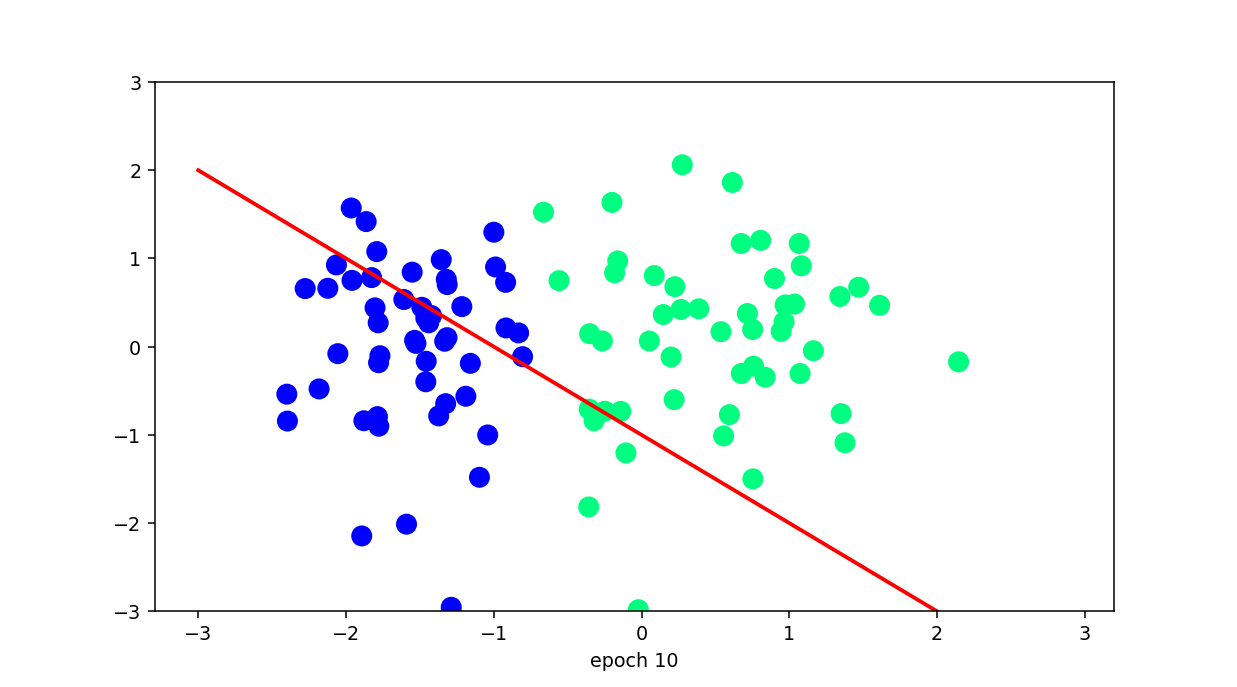

In [48]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

In [49]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [50]:
lor.coef_

array([[3.50204668, 0.02749943]])

In [51]:
m=-(lor.coef_[0][0]/lor.coef_[0][1])
b=-(lor.intercept_/lor.coef_[0][1])

In [52]:
x_input=np.linspace(-3,3,100)
y_input1=m*x_input+b

### Logistic regression is more benificial than peceptron 
##### in perceptron we manage traing data but there are more errore on test data 

<IPython.core.display.Javascript object>


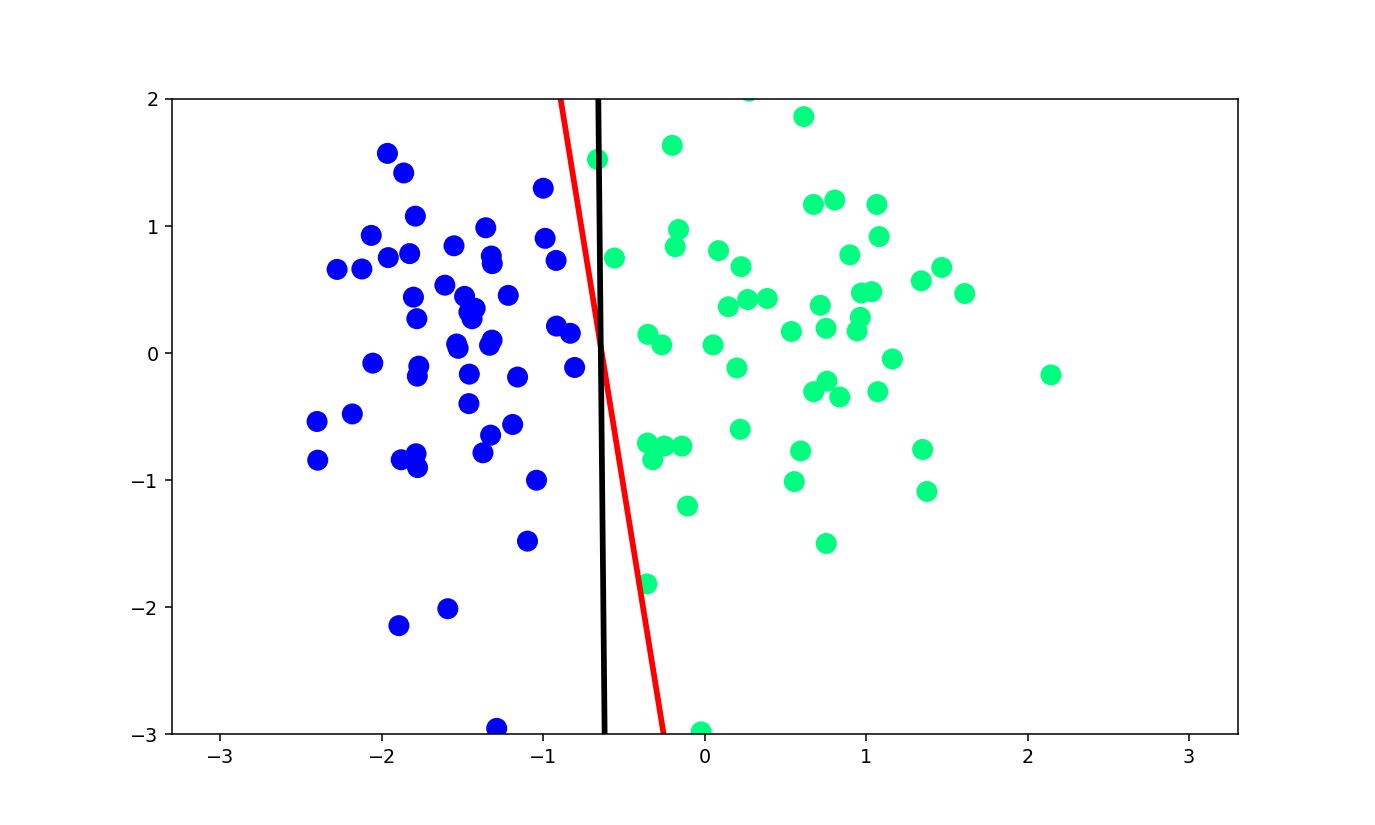

(-3.0, 2.0)

In [53]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

## sigmoid also not work better than Logistic Regression

In [54]:
def perceptron(X,y):
    X=np.insert(X,0,1,axis=1)#add 1 column at starting that contain value 1
    weights=np.ones(X.shape[1])
    lr=0.1
    for i in range(1000):
        j=np.random.randint(0,100)#total 100 rows
        y_hat=sigmiod(np.dot(X[j],weights)) #call step cunction to check value is positive or negative
        weights=weights+lr*(y[j]-y_hat)*X[j] #y[j]=0 means actual placement nahi hua
    return weights[0],weights[1:] #return firstintercept then coefficient

In [55]:
def sigmiod(z):
    return 1/(1+np.exp(-z))

In [56]:
intercept_,coef_=perceptron(X,y)

In [57]:
print(intercept_)
print(coef_)

2.4695869646857513
[ 4.54137411 -0.06266704]


In [58]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [59]:
x_input=np.linspace(-3,3,100)
y_input2=m*x_input+b

<IPython.core.display.Javascript object>


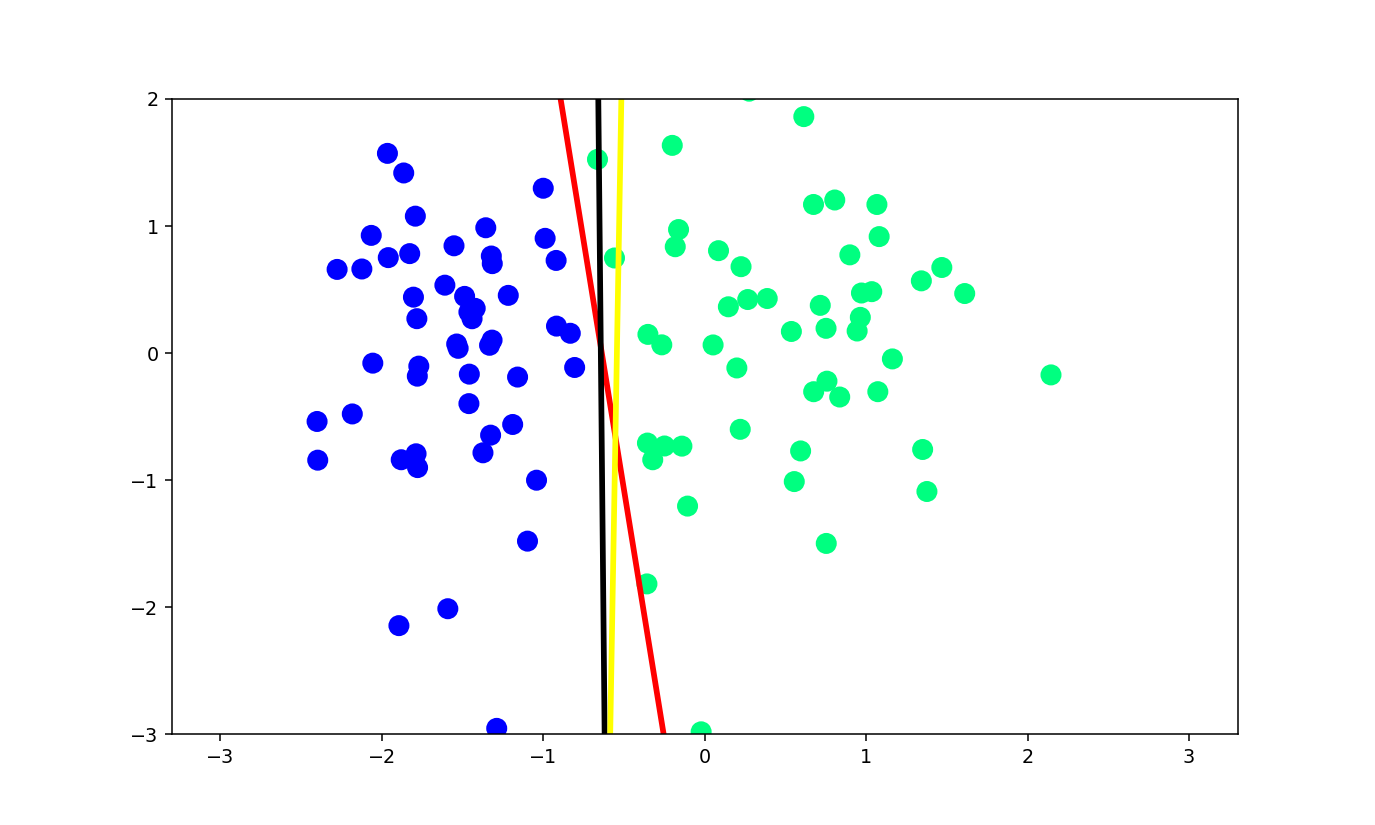

(-3.0, 2.0)

In [62]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input,y_input1,color='black',linewidth=3)
plt.plot(x_input,y_input2,color='yellow',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)